In [1]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 189 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 5.7 kB/s ta 0:00:012     |██████████████████████████      | 18.8 MB 56 kB/s eta 0:01:17
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::jupyterlab_server==1.2.0=py_0
  - conda-forge/linux-64::mistune==0.8.4=py38h1e0a361_1002
  - conda-forge/noarch::nbclient==0.5.1=py_0
  - conda-forge/noarch::alembic==1.4.3=pyh9f0ad1d_0
  - conda-forge/linux-64::terminado==0.9.1=py38h32f6830_1
  - conda-forge/linux-64::pyrsistent==0.17.3=py38h1e0a361_1
  - conda-forge/noarch::jupyter_telemetry==0.0.5=py_0
  - conda-forge/linux-64::tornado==6.1=py38h25fe258_0
  - conda-forge/linux-64::ipython==7.19.0=py38h81c977d_0
  - conda-forge/noarch::nbformat==5.0.8=py_0
  - conda-forge/linux-64::pyzmq==19.0.2=py38ha71036d_2
  - conda-forge/noarch::jupyter_client==6.1.7=py_0
  - conda-forge/linux-64::jupyterhub==1.2.1=py38h578d9bd_0
  - conda-forge/linux-64::notebook==6.1.4=py38h32f6830_1
  - conda-forge/linux-64::entrypoints==0.3=py38h32f6830_1002
  - conda-forge/linux-64::j

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import copy

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.preprocessing import OrdinalEncoder

from scipy import stats as st

from sklearn.preprocessing import StandardScaler

from functools import reduce

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from imblearn.pipeline import Pipeline
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Расчет оттока клиентов

Оператору связи необходимо прогнозировать отток клиентов и если клиент подвержен уходу, то необходимо ему предоставить дополнительные специальные предложения. Оператор связи представляет информацию с данными

__contract.csv__  информация о договоре

__personal.csv__ персональные данные клиента

__internet.csv__ информация об интернет-услугах

__phone.csv__ информация об услугах телефонии

Необходимо разаработать модель оттока клиентов, которая будет выдавать значения уйдет клиент или нет

Порядок работы представлен ниже

<h1>Порядок работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными-contract" data-toc-modified-id="Знакомство-с-данными-contract-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными contract</a></span></li><li><span><a href="#Знакомство-с-данными-personal" data-toc-modified-id="Знакомство-с-данными-personal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Знакомство с данными personal</a></span></li><li><span><a href="#Знакомство-с-данными-internet" data-toc-modified-id="Знакомство-с-данными-internet-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Знакомство с данными internet</a></span></li><li><span><a href="#Знакомство-с-данными-phone" data-toc-modified-id="Знакомство-с-данными-phone-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Знакомство с данными phone</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#подготовка-данных-к-обучению" data-toc-modified-id="подготовка-данных-к-обучению-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>подготовка данных к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-модели" data-toc-modified-id="Создание-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание модели</a></span></li><li><span><a href="#Обучение-на-тренировочных-выборках" data-toc-modified-id="Обучение-на-тренировочных-выборках-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение на тренировочных выборках</a></span></li><li><span><a href="#Первичные-результаты" data-toc-modified-id="Первичные-результаты-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Первичные результаты</a></span></li><li><span><a href="#дополнительный-подбор-параметров" data-toc-modified-id="дополнительный-подбор-параметров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>дополнительный подбор параметров</a></span><ul class="toc-item"><li><span><a href="#catboost" data-toc-modified-id="catboost-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>catboost</a></span></li><li><span><a href="#логическая-регрессия-upsamp" data-toc-modified-id="логическая-регрессия-upsamp-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>логическая регрессия upsamp</a></span></li><li><span><a href="#логическая-регрессия-downsamp" data-toc-modified-id="логическая-регрессия-downsamp-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>логическая регрессия downsamp</a></span></li><li><span><a href="#случайные-деревья-upsamp" data-toc-modified-id="случайные-деревья-upsamp-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>случайные деревья upsamp</a></span></li><li><span><a href="#случайные-деревья-downsamp" data-toc-modified-id="случайные-деревья-downsamp-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>случайные деревья downsamp</a></span></li></ul></li></ul></li><li><span><a href="#Вывод-результата" data-toc-modified-id="Вывод-результата-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод результата</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Ознакомление с данными

### Загрузка данных

In [4]:
contract=pd.read_csv('/datasets/final_provider/contract.csv',parse_dates=['BeginDate'])
personal=pd.read_csv('/datasets/final_provider/personal.csv')
internet=pd.read_csv('/datasets/final_provider/internet.csv')
phone=pd.read_csv('/datasets/final_provider/phone.csv')

### Знакомство с данными contract

In [5]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


Целевой признак хранится в столбце _EndDate_ рассмотрим отношение Positive к общему число данных

In [7]:
contract.query('EndDate!="No"').EndDate.count()/len(contract)

0.2653698707936959

Очевидный дисбаланс классов, необходимо будет провести его коррекци

Добавим целевой признак  _lost_ который будет обозначать покинул компанию или нет 

In [8]:
contract['lost']=contract.apply(
    lambda x: 0 if x['EndDate']=='No' else 1,axis=1)

Также стоит отмететь, что столбец _TotalCharges_ не в том формате. Переведем его во float

при переводе столбца с помощью метода astype(float) возникает ошибка, очевидно, что эта ошибка связана с загрузкой данных. Рассмотрим отдельно данный столбец. Напишем функцию, где если столбец переводится, то ставим True. А если нет то False

In [9]:
def check_numb(row):
    value=row['TotalCharges']
    try :
        num=float(value)
        return True
    except:
        return False

In [10]:
contract['check_num']=contract.apply(check_numb,axis=1)

In [11]:
contract.query('check_num==False')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,check_num
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,0,False
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,0,False
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,0,False
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,0,False
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,0,False
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,0,False
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,0,False
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,0,False
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,0,False
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,0,False


Это значения в которых итоговая сумма стоит как пропуск. 

Обратим внимание, что пропуск стоит в значениях где тип оплаты 2 года, а также начало в 2020 году, то есть дата сумма еще просто не просчиталась

Рассмотрим есть ли такие значения в которых тип оплаты 2 года, а начало пользования к выггрзуки меньше двух лет.

In [12]:
from pandas.tseries.offsets import DateOffset
date_over=pd.to_datetime('2021-02-01')-DateOffset(years=2)

In [13]:
contract.query('BeginDate>@date_over and Type=="Two year"').sort_values(by='BeginDate')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,check_num
1315,5158-RIVOP,2019-03-01,No,Two year,No,Credit card (automatic),20.90,202.3,0,True
3708,6698-OXETB,2019-03-01,No,Two year,No,Mailed check,20.40,231.45,0,True
480,0486-LGCCH,2019-03-01,No,Two year,No,Mailed check,19.65,225.75,0,True
3909,1093-YSWCA,2019-03-01,No,Two year,No,Credit card (automatic),19.55,223.15,0,True
4606,1734-ZMNTZ,2019-03-01,No,Two year,No,Mailed check,25.00,300.7,0,True
4589,1494-EJZDW,2019-04-01,No,Two year,No,Mailed check,20.15,220.8,0,True
993,9108-EQPNQ,2019-04-01,No,Two year,No,Credit card (automatic),26.10,225.55,0,True
159,7554-NEWDD,2019-04-01,No,Two year,No,Bank transfer (automatic),25.70,251.6,0,True
236,0621-JFHOL,2019-04-01,No,Two year,Yes,Mailed check,29.60,299.05,0,True
6220,6434-TTGJP,2019-04-01,No,Two year,No,Credit card (automatic),53.70,521,0,True


Да, такие значения есть, причем заметно как сначала пытлись посчитать сумму ставля его как послений ежемесячный платеж, а потом оставили пустое значение

Заменим все эти числа Nan

In [14]:
contract['TotalCharges']=contract.apply(lambda x: 
               np.NaN if x['TotalCharges']==' ' 
               else float(x['TotalCharges']) ,axis=1)

И удалим столбец check_num

In [15]:
contract.drop(columns='check_num',inplace=True)

In [16]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
lost                7043 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 495.3+ KB


Пока не буду заменять пропуски, проведем дальнейший анализ

Стоит так же отметить на название классификацию других столбцов. Они имеют достаточно обширные широкие названия, поэтому необходимо рассмотреть, не будут ли в них похожие названия, но написанные другим образом

In [17]:
contract.Type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [18]:
contract.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Таких значений нет, переходим к следующим таблицам

### Знакомство с данными personal

In [19]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [20]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


признак _SeniorCitizen_ является категориальным, но здесь он отмечен как целые числа [0,1], в отличие от других признаков. Дл удобства последующего преоразования, приведем все данные к одному виду сразу.[Yes,No] 

In [21]:
personal.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)

### Знакомство с данными internet

In [22]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


Данные неполные, однако это хорошо объясняется тем, что в данной таблице нет тех кто не пользуется интернетом

### Знакомство с данными phone

In [24]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [25]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


Здесь такое же как и с интернетом. Клиенты которые не пользуются телефоном в данную таблицу не внесены

## Анализ данных

Объединим данные

In [26]:
data=contract.merge(personal,on='customerID',how='left')

In [27]:
data.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,No,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,Male,No,No,No


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
lost                7043 non-null int64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 770.3+ KB


Добавим такой признак как время жизни

In [29]:
def calc_live_time(row):
    beggin=row['BeginDate']
    end=row['EndDate']
    date_download=date_down=pd.to_datetime('2020-02-01')# время загрузки датасета
    if end=='No':
        return (date_download-beggin).days
    return (pd.to_datetime(end)-beggin).days

In [30]:
data['live_time']=data.apply(calc_live_time,axis=1)
data.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,gender,SeniorCitizen,Partner,Dependents,live_time
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,No,Yes,No,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,Male,No,No,No,1036


In [31]:
data.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,gender,SeniorCitizen,Partner,Dependents,live_time
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,No,Yes,No,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,Male,No,No,No,1036


In [32]:
data=data.merge(internet,on='customerID',how='left')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
lost                7043 non-null int64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
live_time           7043 non-null int64
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: datetime64[ns](1

In [34]:
data=data.merge(phone,on='customerID',how='left')

Создадим новый датафрем на котором в далнешем будем проводить обучение

In [35]:
data_for_learning=copy.copy(data)

Заменим данные с пропусками в _TotalCharges_ оплатой за последний месяц

In [36]:
data_for_learning['TotalCharges']=data_for_learning.apply(lambda x: 
                       x['MonthlyCharges'] if x['TotalCharges']!=x['TotalCharges']
                       else x['TotalCharges'],axis=1)

In [37]:
data_for_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
lost                7043 non-null int64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
live_time           7043 non-null int64
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361

Во время стыковки данных появились пропуски из интернета и телефона, так как клиенты не использовали интернет или телефон. Заменим данные пропуски _no_internet_ и _no_phone_ соответвенно

In [38]:
column_for_internet=internet.drop(columns='customerID',axis=1).columns
column_for_phone=phone.drop(columns='customerID',axis=1).columns
replace_column={}
for i in (column_for_internet):
    replace_column[i]='no_internet'
for i in (column_for_phone):
    replace_column[i]='no_phone'
replace_column

{'InternetService': 'no_internet',
 'OnlineSecurity': 'no_internet',
 'OnlineBackup': 'no_internet',
 'DeviceProtection': 'no_internet',
 'TechSupport': 'no_internet',
 'StreamingTV': 'no_internet',
 'StreamingMovies': 'no_internet',
 'MultipleLines': 'no_phone'}

In [39]:
data_for_learning.fillna(value=replace_column,inplace=True)

In [40]:
data_for_learning.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,lost,gender,...,Dependents,live_time,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,31,DSL,No,Yes,No,No,No,No,no_phone
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,1036,DSL,Yes,No,Yes,No,No,No,No


Рассмотрим распредление дат, когда клиенты покинули компанию

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


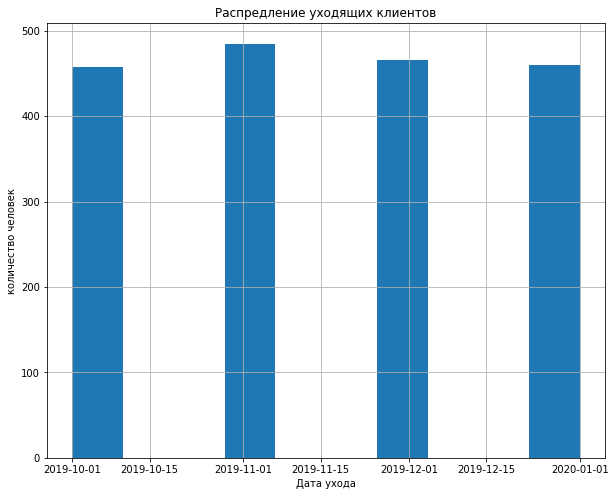

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
pd.to_datetime(data_for_learning.query('lost==1')['EndDate']).hist(bins=10)
ax.set_xlabel('Дата ухода');
ax.set_ylabel('количество человек');
ax.set_title('Распредление уходящих клиентов');


Стоит отметить, что клиенты уходят каждый месяц примерно в равном количестве

Рассмотрим также распределение уходящих клиентов

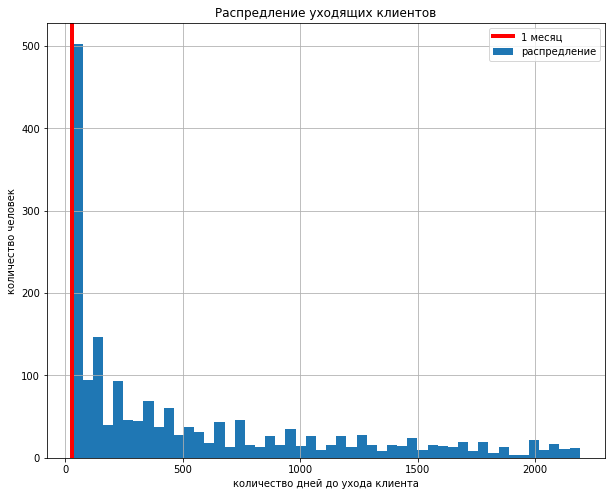

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
(data_for_learning.query('lost==1')['live_time']).hist(bins=50,label='распредление')
ax.set_xlabel('количество дней до ухода клиента');
ax.set_ylabel('количество человек');
ax.set_title('Распредление уходящих клиентов');
plt.axvline(x=30,color='r',linewidth=4,label='1 месяц')
ax.legend()

Здесь отчетливо видно, что наибольшее количестов клиентов уходит после  1 месяца пользования

Рассмотрим корреляцию данных между собой

In [43]:
data_for_learning.corr()

,MonthlyCharges,TotalCharges,lost,live_time
MonthlyCharges,1.000000,0.651182,0.193356,0.247754
TotalCharges,0.651182,1.000000,-0.198347,0.826095
lost,0.193356,-0.198347,1.000000,-0.352673
live_time,0.247754,0.826095,-0.352673,1.000000


По данной таблице видно, что корреляция у признака _live_time_ и _Total_charges_ равна 0,82. Один из признаков необходимо убрать. преполагаю, что необходимо убрать _TotalCharges_ так как его данные были с пропусками и их приходилось заменять

В данной таблице представлены лишь часть признаков, так как остальные признаки категориальные, их необходимо закодировать техникой прямого кодирования. 

Создадим таблицу для нахождения данной корреляции,исключив сразу данные которые не будут использовать при обучение

In [44]:
data_for_corr=data_for_learning.drop(columns=['EndDate','customerID','BeginDate','lost'],axis=1)

In [45]:
cat_column=[]
for i in data_for_corr.columns:
    if  data_for_corr[i].dtypes=='object':
        cat_column.append(i)
cat_column 

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [46]:

ordinal_code = ColumnTransformer([
    ('ordinal_code', OrdinalEncoder(),cat_column)
])

In [47]:
data_corr=ordinal_code.fit_transform(data_for_corr)

data_cat_for_corr=pd.DataFrame(data=data_corr,columns=cat_column)
data_cat_for_corr.corr()

,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
Type,1.000000,-0.176733,-0.227543,0.000126,-0.142554,0.294806,0.243187,0.099721,0.389978,0.351267,0.390216,0.418440,0.327951,0.330993,0.078613
PaperlessBilling,-0.176733,1.000000,-0.062904,-0.011754,0.156530,-0.014877,-0.111377,-0.138625,-0.334003,-0.262402,-0.276326,-0.310749,-0.203907,-0.211818,0.108230
PaymentMethod,-0.227543,-0.062904,1.000000,0.017352,-0.038551,-0.154798,-0.040292,0.086140,0.046811,0.030759,0.024603,0.042466,0.042929,0.038936,-0.124982
gender,0.000126,-0.011754,0.017352,1.000000,-0.001874,-0.001808,0.010517,-0.000863,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,-0.000485
SeniorCitizen,-0.142554,0.156530,-0.038551,-0.001874,1.000000,0.016479,-0.211185,-0.032310,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,0.099883
Partner,0.294806,-0.014877,-0.154798,-0.001808,0.016479,1.000000,0.452676,0.000891,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.090981
Dependents,0.243187,-0.111377,-0.040292,0.010517,-0.211185,0.452676,1.000000,0.044590,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,-0.016875
InternetService,0.099721,-0.138625,0.086140,-0.000863,-0.032310,0.000891,0.044590,1.000000,0.607788,0.658287,0.662957,0.609795,0.712890,0.709020,-0.340949
OnlineSecurity,0.389978,-0.334003,0.046811,-0.003429,-0.210897,0.081850,0.190523,0.607788,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,-0.235021
OnlineBackup,0.351267,-0.262402,0.030759,-0.002032,-0.152780,0.087055,0.162445,0.658287,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,-0.210372


Здесь также можно заметить признаки которые отвечают за доп услуги за интеренет, корреляциия которых больше или близка 0,7. Предлагаю их также удалить. Так как по сути признаки OnlineSecurity',_OnlineBackup_,_DeviceProtection_,_TechSupport_,_StreamingTV_,_StreamingMovies_ являются повторением столбца _InternetService_

Так как данное утверждение явлется достаточно спорным, необзодимо проверить данные гиппотезы

Создадим отдельную таблицу для этого анализа

In [48]:
p=data_for_learning.loc[:,['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

In [49]:
p.replace({'Yes':1,'no_internet':0,'No':0},inplace=True)

In [50]:
p

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,1,0,1,1,1,1
7039,0,1,1,0,1,1
7040,1,0,0,0,0,0
7041,0,0,0,0,0,0


In [51]:
p['count']=reduce(lambda x,y: x+y,np.transpose(p.values))

In [52]:
p['InternetService']=data_for_learning['InternetService']
p

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,count,InternetService
0,0,1,0,0,0,0,1,DSL
1,1,0,1,0,0,0,2,DSL
2,1,1,0,0,0,0,2,DSL
3,1,0,1,1,0,0,3,DSL
4,0,0,0,0,0,0,0,Fiber optic
...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,5,DSL
7039,0,1,1,0,1,1,4,Fiber optic
7040,1,0,0,0,0,0,1,DSL
7041,0,0,0,0,0,0,0,Fiber optic


In [53]:
code_for_corr = ColumnTransformer([
    ('code', OrdinalEncoder(),['InternetService'])
])

In [54]:
p['InternetService']=code_for_corr.fit_transform(p)

Теперь у нас есть таблица, в которой произведена кодировка категориальных данных.

Проверим нулевую гиппотезу, что выборки с _InternetService_ и дополнительных услуг совпадают. Если нулевая теория принимается, то на выходе выдается столбец принадлежный к удалению

In [55]:
for col in p.columns:
    for i in range(0,3):
        internet_servies=p.apply(lambda x: 1 if x['InternetService']==i else 0,axis=1)
        extra_servies=p[col]
        results = st.ttest_rel(internet_servies, extra_servies)
        if results.pvalue>0.05:
            print(i,col)

0 OnlineBackup
0 DeviceProtection


Таким образом нулевая теория принялась только для столбцов _OnlineBackup_ и _DeviceProtection_. Удлаим эти столбцы, так как они дублируют _InternetService_.  А также не забудем про _TotalCharges_

In [56]:
data_for_learning.drop(
   columns=['TotalCharges','OnlineBackup','DeviceProtection'],axis=1,inplace=True)
    
data_for_learning

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,lost,gender,SeniorCitizen,Partner,Dependents,live_time,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,0,Female,No,Yes,No,31,DSL,No,No,No,No,no_phone
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,0,Male,No,No,No,1036,DSL,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,1,Male,No,No,No,61,DSL,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,0,Male,No,No,No,1371,DSL,Yes,Yes,No,No,no_phone
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,1,Female,No,No,No,61,Fiber optic,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,0,Male,No,Yes,Yes,730,DSL,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,0,Female,No,Yes,Yes,2191,Fiber optic,No,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,0,Female,No,Yes,Yes,337,DSL,Yes,No,No,No,no_phone
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,1,Male,Yes,Yes,No,123,Fiber optic,No,No,No,No,Yes


## подготовка данных к обучению

In [57]:
target=data_for_learning['lost']
feauters=data_for_learning.drop(columns=['EndDate','customerID','BeginDate','lost'],axis=1)

In [58]:
features_train, features_test, target_train, target_test = train_test_split(
    feauters, target, test_size=0.2, random_state=42,stratify=target)

## Обучение

Стоит отметить, что для обучения будут использоваться категоиальлные признаки, которые необходимо будет перекодировать, поэтому выпишем их отдельно, а количественные отдельно

In [59]:
cat_column=[]
num_column=[]
for i in feauters.columns:
    if  feauters[i].dtypes=='object':
        cat_column.append(i)
    elif (feauters[i].dtypes=='int64' or feauters[i].dtypes=='float64'):
        num_column.append(i)
    else:
        print('Warning!! есть еще типы')
print(cat_column)
print(num_column)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
['MonthlyCharges', 'live_time']


### Создание модели

In [60]:
#Модель catboost
catboost_model = CatBoostClassifier(loss_function='Logloss',eval_metric='AUC:hints=skip_train~false',iterations=1000)


Для моделей логистическая регрессия и случайные леревья  необходимо будет перекодировать данные, а количесвенные данные отмасштабируем

In [61]:


column_trans = ColumnTransformer([
    ('Ohe_code',OneHotEncoder(drop='first'),cat_column),
    ('standardscaler',StandardScaler(),num_column)
])

Создадим Pipeline для обучения, в которых будет включено 
    
    -перекодировать данные методом OHE
    
    -исправление дисбаланса методом upsampling или downsampling
    
    -модель

In [62]:
#логистическая регрессия
pipe_lr_upsampling=(
    Pipeline([('Ohe_code',
 column_trans),
              ('upsampling',
SMOTE(random_state=42)),
               ('lr',
LogisticRegression(random_state=42,class_weight='balanced',solver='liblinear'))])
              )

In [63]:
#логистическая регресси
pipe_lr_downsampling=(
    Pipeline([('Ohe_code',
column_trans),
              ('downsampling',
RandomUnderSampler(sampling_strategy=0.5)),
               ('lr',
LogisticRegression(random_state=42,class_weight='balanced',solver='liblinear'))])
              )

In [64]:
#случайный деревья
pipe_rf_upsampling=(
    Pipeline([('Ohe_code',
 column_trans),
              ('upsampling',
SMOTE(random_state=42)),
               ('rf',
RandomForestClassifier(random_state=42))])
              )

In [65]:


#случайный деревья
pipe_rf_downsampling=(
    Pipeline([('Ohe_code',
 column_trans),
              ('downsampling',
RandomUnderSampler(sampling_strategy=0.5)),
               ('rf',
RandomForestClassifier(random_state=42))])
              )



In [66]:
# lgbm
pipe_lgbm_upsampling=(
    Pipeline([('Ohe_code',
 column_trans),
              ('upsampling',
SMOTE(random_state=42)),
               ('lgbm',
lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', class_weight = 'balanced',learning_rate=0.05))])
              )

In [67]:
# lgbm
pipe_lgbm_downsampling=(
    Pipeline([('Ohe_code',
 column_trans),
              ('downsampling',
RandomUnderSampler(sampling_strategy=0.5)),
               ('lgbm',
lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', class_weight = 'balanced',learning_rate=0.05))])
              )

Обучение будет проходить с помощью кросвалидации, создадим для этого функцию

In [68]:
def func_gs(pip,param,features,target):
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    gs=GridSearchCV(estimator=pip,param_grid=param,cv=kf,scoring='roc_auc')
    gs.fit(features,target)
    print(roc_auc_score(target,gs.best_estimator_.predict(features)))
    print(roc_auc_score(target_test,gs.best_estimator_.predict(features_test)))
    return gs.best_estimator_

Создадим параметры для кроссвалидации

In [69]:
#параметры для логистической регрессии
param_lr={'lr__max_iter':[30,50,75,100]}

In [70]:
#параметры для случайных деревьев
param_rf={'rf__n_estimators':[75,100],
          'rf__max_depth':[30,50]
          
         }

In [71]:
#параметры для lgblight
param_lgbm={'lgbm__n_estimators':[100,500],
           'lgbm__max_depth':[10,30,50]}

### Обучение на тренировочных выборках

In [72]:
catboost_model=(catboost_model.fit(
    features_train, target_train,cat_features=cat_column, verbose=100))

Learning rate set to 0.027328
0:	learn: 0.8343391	total: 143ms	remaining: 2m 23s
100:	learn: 0.8757717	total: 7.41s	remaining: 1m 5s
200:	learn: 0.8883733	total: 14.4s	remaining: 57.1s
300:	learn: 0.8979816	total: 21.5s	remaining: 50s
400:	learn: 0.9112256	total: 29.3s	remaining: 43.7s
500:	learn: 0.9221209	total: 37.4s	remaining: 37.2s
600:	learn: 0.9325010	total: 45.7s	remaining: 30.3s
700:	learn: 0.9405484	total: 52s	remaining: 22.2s
800:	learn: 0.9479076	total: 57.4s	remaining: 14.3s
900:	learn: 0.9532739	total: 1m 2s	remaining: 6.91s
999:	learn: 0.9578235	total: 1m 8s	remaining: 0us


In [73]:
lr_up=func_gs(pipe_lr_upsampling,param_lr,features_train,target_train)

0.7667003889101225
0.7521764964220207


In [74]:
lr_dw=func_gs(pipe_lr_downsampling,param_lr,features_train,target_train)

0.7677496301192427
0.7523224573096696


In [75]:
rf_up=func_gs(pipe_rf_upsampling,param_rf,features_train,target_train)

0.9975380607501367
0.7356183316541373


In [76]:
rf_dw=func_gs(pipe_rf_downsampling,param_rf,features_train,target_train)

0.9776705956312457
0.7322031052210081


### Первичные результаты

Создадим итоговую таблицу в которой будут отражены данные обучения

In [77]:
table=pd.DataFrame(columns=['модель','AUC тренировка','AUC тест','accuracy тест'])


Выпишем модели, которые будем использовать

In [78]:
use_model={'catboost':catboost_model,
           'логическая регрессия upsamp':lr_up,
           'логическая регрессия downsamp':lr_dw,
           'случайные деревья upsamp':rf_up,
           'случайные деревья downsamp':rf_dw}


In [79]:
for ml in use_model:
    pipe=use_model[ml]
    pred=pipe.predict(features_test)
    
    
    AUC_train=roc_auc_score(target_train,pipe.predict(features_train))
    
    AUC_test=roc_auc_score(target_test,pred)
    accu=accuracy_score(target_test,pred)
    model=ml
    output_array=[model,AUC_train,AUC_test,accu]
    
    table=table.append({'модель':output_array[0],
                 'AUC тренировка':output_array[1],
                 'AUC тест':output_array[2],
                    'accuracy тест':output_array[3]
                   },
                  ignore_index=True)
table

,модель,AUC тренировка,AUC тест,accuracy тест
0,catboost,0.825655,0.776872,0.861604
1,логическая регрессия upsamp,0.766700,0.752176,0.743790
2,логическая регрессия downsamp,0.767750,0.752322,0.740241
3,случайные деревья upsamp,0.997538,0.735618,0.793471
4,случайные деревья downsamp,0.977671,0.732203,0.793471


Получены первичные результаты обучения. Необходимо исследовать, как получится поднять метрику

### дополнительный подбор параметров

#### catboost

запомним наилучшее значение целевой метрики AUC

In [80]:
first_metric_catboost_model=roc_auc_score(target_test,catboost_model.predict(features_test))
first_metric_catboost_model

0.7768723035986462

представим график значимых признаков

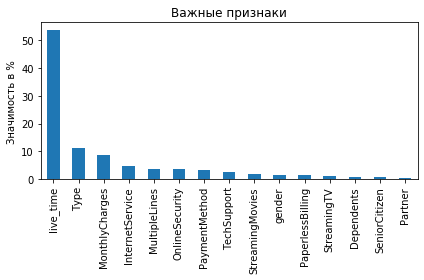

In [81]:
importances=catboost_model.feature_importances_
catboost_model_importances = pd.Series(importances,index=catboost_model.feature_names_).sort_values(ascending=False)

fig, ax = plt.subplots()
catboost_model_importances.plot.bar(ax=ax)
ax.set_title("Важные признаки")
ax.set_ylabel("Значимость в %")
fig.tight_layout()

Действительно, есть большая часть признаков у которых меньшее влияние. Подберем наилучшее модели

Путем перебора признаков наилучший результат удалось достигнуть исключив столбцы OnlineBackup,TechSupport,StreamingTV,StreamingMovies

In [82]:
ar=['OnlineSecurity','TechSupport','StreamingTV','StreamingMovies']


In [83]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3738 to 5639
Data columns (total 15 columns):
Type                5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
gender              5634 non-null object
SeniorCitizen       5634 non-null object
Partner             5634 non-null object
Dependents          5634 non-null object
live_time           5634 non-null int64
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
MultipleLines       5634 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 704.2+ KB


In [84]:
catboost_model=(catboost_model.fit(
    features_train.drop(columns=ar,axis=1), target_train,cat_features=list(filter(lambda x: x not in ar, cat_column)), verbose=100))

Learning rate set to 0.027328
0:	learn: 0.8282367	total: 6.02ms	remaining: 6.01s
100:	learn: 0.8742348	total: 3.85s	remaining: 34.3s
200:	learn: 0.8862363	total: 8.57s	remaining: 34.1s
300:	learn: 0.8962425	total: 12.2s	remaining: 28.4s
400:	learn: 0.9091414	total: 16.1s	remaining: 24s
500:	learn: 0.9207138	total: 20.1s	remaining: 20.1s
600:	learn: 0.9312059	total: 24.2s	remaining: 16.1s
700:	learn: 0.9389137	total: 28.3s	remaining: 12.1s
800:	learn: 0.9461921	total: 32.5s	remaining: 8.07s
900:	learn: 0.9523825	total: 36.5s	remaining: 4.01s
999:	learn: 0.9569309	total: 40.7s	remaining: 0us


In [85]:
if roc_auc_score(target_test,catboost_model.predict(features_test.drop(columns=ar,axis=1)))>first_metric_catboost_model:
    first_metric_catboost_model=roc_auc_score(target_test,catboost_model.predict(features_test.drop(columns=ar,axis=1)))
    print('Метрика увеличилась',first_metric_catboost_model)
else:
    print('Метрика уменьшилась')

Метрика увеличилась 0.7786135007362629


Отлично, метрика увеличилась, пробуем дальше

Отметим еще, что можно поменять Learning_rate, а также порог классификации. Напишем для этого функцию и применим ее

In [86]:
def search_threshold(model,features_test,target_test):
    k=pd.DataFrame({'probablity':model.predict_proba(features_test)[:,1]})
    search_threshold=pd.DataFrame(columns=['threshold','AUC'])
    for threshold in np.arange(0,1,0.001):
        k['predict']=k.apply(lambda x: 0 if x['probablity']<threshold else 1,axis=1)
        new_row={'threshold':threshold,
                     'AUC':roc_auc_score(target_test,k['predict'])}
        
        search_threshold=search_threshold.append(new_row,ignore_index=True)
    return search_threshold.sort_values(by='AUC',ascending=False,).head(1).reset_index(drop=True)
    

In [87]:
total_table=pd.DataFrame(columns=['rate','threshold','AUC'])
for rate in np.arange(0.17,0.173,0.001):
    catboost_model = CatBoostClassifier(loss_function='Logloss',\
                                        eval_metric='AUC:hints=skip_train~false',\
                                        iterations=1200,learning_rate=rate)
    
    (catboost_model.fit(
    features_train.drop(columns=ar,axis=1),
        target_train,
        cat_features=list(filter(lambda x: x not in ar, cat_column)), 
        verbose=False))
    
    threshold=search_threshold(catboost_model,features_test.drop(columns=ar,axis=1),target_test)
    new_row={'rate':rate,
            'threshold':round(threshold.loc[0,'threshold'],3),
                     'AUC':round(threshold.loc[0,'AUC'],4)}
    print(new_row)
    total_table=total_table.append(new_row,ignore_index=True)
    
total_table

{'rate': 0.17, 'threshold': 0.157, 'AUC': 0.8484}
{'rate': 0.171, 'threshold': 0.221, 'AUC': 0.8519}
{'rate': 0.17200000000000001, 'threshold': 0.17, 'AUC': 0.8473}


,rate,threshold,AUC
0,0.170,0.157,0.8484
1,0.171,0.221,0.8519
2,0.172,0.170,0.8473


Таким образом найдена наилучшая модель. Запомним ее  вместе со значимыми признакми

In [88]:
catboost_model = CatBoostClassifier(loss_function='Logloss',\
                                        eval_metric='AUC:hints=skip_train~false',\
                                        iterations=1200,learning_rate=0.171)
    
(catboost_model.fit(
    features_train.drop(columns=ar,axis=1),
        target_train,
        cat_features=list(filter(lambda x: x not in ar, cat_column)), 
        verbose=False))

feauters_for_catboost=catboost_model.feature_names_

In [89]:
def for_best_model(name,model,feauters,target,threshold):
    prob=model.predict_proba(feauters)[:,1]
    #return(prob)
    pred=list(map(lambda x:0 if x<threshold else 1, prob))
    AUC=round(roc_auc_score(target,pred),3)
    recall=round(recall_score(target,pred),3)
    precision=round(precision_score(target,pred),3)
    accuracy=round(accuracy_score(target,pred),3)
    return [name,threshold,AUC,recall,precision,accuracy]

In [90]:
best_model_catboost=for_best_model('catboost_model',\
                                   catboost_model,\
                                   features_test.loc[:,feauters_for_catboost],\
                                   target_test,0.221)
best_model_catboost

['catboost_model', 0.221, 0.852, 0.824, 0.713, 0.865]

#### логическая регрессия upsamp

Выделим наиболее удачный порог для данной модели

In [91]:
search_threshold(lr_up,features_test,target_test)

,threshold,AUC
0,0.403,0.760579


In [92]:
best_model_lr_up=for_best_model('логическая регрессия upsamp',lr_up,features_test,target_test,0.403)
best_model_lr_up

['логическая регрессия upsamp', 0.403, 0.761, 0.869, 0.474, 0.71]

#### логическая регрессия downsamp

Выделим наиболее удачный порог для данной модели

In [93]:
search_threshold(lr_dw,features_test,target_test)

,threshold,AUC
0,0.442,0.756355


In [94]:
best_model_lr_dw=for_best_model('логическая регрессия downsamp',lr_dw,features_test,target_test,0.435)
best_model_lr_dw

['логическая регрессия downsamp', 0.435, 0.755, 0.834, 0.481, 0.718]

#### случайные деревья upsamp

Выделим наиболее удачный порог для данной модели

In [95]:
search_threshold(rf_up,features_test,target_test)

,threshold,AUC
0,0.337,0.755041


In [96]:
best_model_rf_up=for_best_model('случайные деревья upsamp',rf_up,features_test,target_test,0.337)
best_model_rf_up

['случайные деревья upsamp', 0.337, 0.755, 0.759, 0.524, 0.753]

#### случайные деревья downsamp

Выделим наиболее удачный порог для данной модели

In [97]:
search_threshold(rf_dw,features_test,target_test)

,threshold,AUC
0,0.299,0.766612


In [98]:
best_model_rf_dw=for_best_model('случайные деревья downsamp',rf_dw,features_test,target_test,0.46)
best_model_rf_dw

['случайные деревья downsamp', 0.46, 0.752, 0.668, 0.594, 0.791]

## Вывод результата

Теперь когда модели все собраны создадим итоговую таблицу 

In [99]:
general=pd.DataFrame(columns=['name','threshold','AUC','recall','precission','accuracy'],
                     data=[best_model_catboost,best_model_lr_up,best_model_lr_dw,best_model_rf_up,best_model_rf_dw])
general

,name,threshold,AUC,recall,precission,accuracy
0,catboost_model,0.221,0.852,0.824,0.713,0.865
1,логическая регрессия upsamp,0.403,0.761,0.869,0.474,0.710
2,логическая регрессия downsamp,0.435,0.755,0.834,0.481,0.718
3,случайные деревья upsamp,0.337,0.755,0.759,0.524,0.753
4,случайные деревья downsamp,0.460,0.752,0.668,0.594,0.791


## Вывод

Работа прохоила согласно плану. На начальном этапе произошел анализ таблиц на наличие пропусков. Представленные данные были без пропусков, но необходимо было провести обработку данных: переделать тип данных. Столбец _Total_charges_ из таблице contract.csv представлен не как чиловое значение а как строковое. После этого все данные были объединины в общу таблицу. ПРи анализе общих данных стоит отметить, что отток клиентов происходит равномерно каждый месяц примерно около 500 человек, при этом стоит обратить серьезное внимание, что уход от оператор наиболее преобладает после первого месяца!!

На этапе добыча признаков добавлен новый признак как время жизни клиента, при этом замечено,что для обучения наилучшим вариатом является представление этого признака в днях. Педполагалось, что время жизни потребуется категоризация(короткий пеиод, средний, длинный, очень высокий, но этого не потребовалось.
Так же анализируя данные замечено, что часть данных коррелируют друг с другом, поэтому признаки _OnlineBackup_, _DeviceProtection_ и _Total_charges_  были удалены из общей выборки.

После обучения получены значения метрик, однако требовалось еще еще подтюнить параметры. С помощью feauters_importance и подбора порога классификации удалось достичь необходимой метрике. Небольшая сложность возникла с feauters_importance. не смотря на то, что часть признаков являлось менее важными они на целевую метрику они влияли сильно. Важным этапом подбора параметров являлся выбор порога классификации, так как после него прирост в метрика оказалася около 0,08. Так же важным фактором оказался перевод времени жизни в днях, с этим параметром модель работала эффективнее. Также хороший прирост дало масштабирование количественных данных.


Таким образом наилучшая модель это модель реализованная на catboost с итоговой метрикой ROC-AUC 0,852 с поргом классификации 0,221, при этом значимыми признаками являются _Type_,
 _PaperlessBilling_,
 _PaymentMethod_,
 _MonthlyCharges_,
 _gender_,
 _SeniorCitizen_,
 _Partner_,
 _Dependents_,
 _live_time_,
 _InternetService_,
 _MultipleLines_. значение recall 0,824 precission  0,713 accuracy 0,865
 
